In [60]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib as plt

In [61]:
import json
import pickle
from keras.models import load_model

In [62]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
intents = json.loads(open(r'dashboard.json').read())
words = pickle.load(open(r'words.pkl','rb'))
classes = pickle.load(open(r'classes.pkl','rb'))

In [64]:
model = load_model(r'chatbot_model.h5')

In [65]:
def clean_up_sentence(sentence):
  sentence_words = nltk.word_tokenize(sentence)
  sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
  return sentence_words

In [66]:
def bow(sentence, words, show_details=True):
  sentence_words = clean_up_sentence(sentence)
  bag = [0]*len(words)  
  for s in sentence_words:
      for i,w in enumerate(words):
          if w == s: 
              bag[i] = 1
              if show_details:
                  print("found in bag: %s" % w)
  return(np.array(bag))

In [67]:
def predict_class(sentence, model):
  p = bow(sentence, words,show_details=False)
  res = model.predict(np.array([p]))[0]
  ERROR_THRESHOLD = 0.25
  results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
  results.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  for r in results:
      return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
  return return_list


In [68]:
df = pd.read_excel(r'Agg_retail_realtime.xlsx')

In [69]:
def shape():
  print(df.shape[0],df.shape[1])

In [70]:
def summary():
  x=df.describe
  print(x)

In [71]:
def columns():
  print(df.columns)

In [72]:
def topdealers():
    top_dealers=df.groupby('CUSTOMER_NAME')['TOTAL_RETAIL'].sum().sort_values(ascending=False)[:5][::-1]
    response=top_dealers.index.values
    print(response)

In [73]:
def options():
  s='Try asking me:\n\
  Columns or attributes of the dataset \n\
  Shape and size of dataset \n\
  Summary about the dataset \n\
  Plot a line graph \n\
  details about dataset \n\n'
  print(s)

In [74]:
def drawline():
  print('Choose X and Y from columns below')
  numerical_columns=df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())
  for items in numerical_columns.iteritems(): 
    if items[1]==True:
      print(items[0])
  print('Input X')
  X=input()
  print('Input Y')
  Y=input()
  df.plot(X,Y)

In [75]:
def getResponse(ints, intents_json):
  tag = ints[0]['intent']
  list_of_intents = intents_json['intents']
  for i in list_of_intents:
      if(i['tag']== tag):
          result = random.choice(i['responses'])
          break
  return result

In [76]:
def chatbot_response(msg):
  ints = predict_class(msg, model)
  res = getResponse(ints, intents)
  return res

In [77]:
def process(msg):
  ints = predict_class(msg, model)
  tag = ints[0]['intent']
  if tag=='Top_dealers':
      topdealers()
  elif tag=='shape':
      shape()
  elif tag=='columns':
      columns()
  elif tag=='lineplot':
      drawline()
  elif tag=='options':
      options()
  elif tag=='summary':
      summary()

In [78]:
def input_value():
  msg=input()
  print(chatbot_response(msg))
  process(msg)

plot a line graph
Line plot opened in a new window:
Choose X and Y from columns below
MTD_RETAIL
LIVE_RETAIL
LIVE_RETAIL_REVERSAL
NET_LIVE_RETAIL
TOTAL_RETAIL
ORG_ID
Input X
NET_LIVE_RETAIL
Input Y
TOTAL_RETAIL


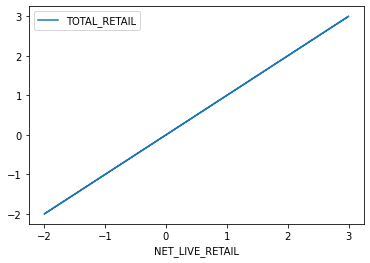

In [80]:
input_value()